# Guía 2 Problema 10: Simulación de un detector de fotones
---------------------------------------------------------------------
*Por Gabriel Goren. L.U.:199/15. FCEN - UBA*

**(a)** _La mayor parte de los lenguajes de programación y muchos programas con orientación cientı́fica incluyen
generadores de números pseudoaleatorios con distribución uniforme en [0, 1). Cualquier conjunto de
dichos números constituye una muestra de una variable aleatoria continua (tema de la guía siguiente)
con dicha distribución, pero aquı́ nos interesa solamente el hecho de que pueden ser usados para simular
experimentos de Bernoulli. Mostrar que la probabilidad de que tal generador entregue un número en
[0, p) (0 ≤ p ≤ 1) es p (y en [p, 1) es 1 − p). Implemente, a partir de esta propiedad, un programa que genere el resultado de una serie de n experimentos de Bernoulli independientes y cuente el número de
éxitos obtenido. Considere n y la probabilidad de éxito p como parámetros libres._

En primer lugar mostramos computacionalmente que si $X \sim U[0,1]$ entonces $Pr(X \in [0,p)) = p \forall p \in [0,1]$. Una vez establecido esto se deduce trivialmente que $Pr(X \in [p,1)) = 1 - p$.


In [5]:
from numpy.random import uniform
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
%matplotlib inline

### a

# Muestro computacionalmente que la probabilidad
# de que salga un número entre 0 y p es p.

def gen_nprom():
    "Genera 100 números aleatorios entre 0 y 1, cuenta cuántos son menores o \
    iguales a p. \
    Esto se realiza 100 veces y se calcula el promedio. Todo el proceso se hace \
    una vez para cada valor de p = 0.1, 0.2, ... 0.9. La función devuelve una  \
    lista con el promedio para cada valor de p."
    nprom = []
    for p in  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        n = []
        for i in range(100):
            # Lista con números aleatorios
            xs = (uniform() for k in range(100)) #xs es un generador, no una lista
            # Los éxitos son los números que resultaron ser
            # menores que p
            exitos = list(filter(lambda n: n < p, xs))
            n.append(len(exitos))
        nprom.append(sum(n)/len(n))
    return nprom
gen_nprom()

[10.36, 20.58, 30.24, 39.83, 49.36, 60.22, 70.38, 79.94, 89.97]

Los promedios calculados se pueden tomar como estimadores para la esperanza de las variables aleatorias "cantidad de números menores a p si genero 100 entre 0 y 1." A su vez, la probabilidad de que un número aleatorio entre 0 y 1 sea menor a p se estima como esa esperanza dividida por el número total de números generados, que en este caso es 100.

Por lo tanto, se estima a partir del output de esta función que la probabilidad de que un número aleatorio distribuido uniformemente entre 0 y 1 sea menor a p es igual a p.

(Demostrar que esto es cierto analíticamente es trivial, pero eso es un asunto de la Guía 3).

------------------

Ahora usando este hecho implementamos una función `bernoulli(n,p)` que simula una sucesión de experimentos de Bernoulli. En otras palabras, `bernoulli(n,p)` es un generador de números aleatorios con distribución $Binomial(n,p)$.

In [3]:
def bernoulli(n,p):
    trials = (uniform() for k in range(n))
    exitos = list(filter(lambda n: n < p, trials))
    return len(exitos)

**(f)** ¿*Qué distribución espera para que el número de datos en una determinada clase (bin) de un histograma
y por qué? Use la desviación estándar como una estimación de la incerteza de dicha variable y grafique
barras de error sobre los histogramas realizados. Discuta el sentido en que deben interpretarse las
posibles discrepancias entre las distribuciones de probabilidad teóricas y los histogramas.*

Discutimos este punto primero para hacer los histogramas de los otros incisos directamente con sus barras de error.

Los números de datos $X_i$ en cada uno de los $i$ bines de un histograma tienen una distribución conjunta _multinormal_ $f(x_1,...,x_N; n, p_1, ... p_N)$ donde $n$ es el número total de entradas en el bin y cada parámetro $p_i$ es la probabilidad de que un dato caiga en el $i$-ésimo bin.

El número de datos en el $i$-ésimo bin, independientemente de cuántos datos haya en los demás, estará dado por la distribución marginal para dicho bin, la cual resulta ser una binomial $B(x_i;n,p_i)$. Por lo tanto la varianza de $X_i$ es $n \, p_i \, (p_i-1)$. Como en general vamos a tener una cantidad grande de bines (en este ejercicio, por lo menos 15), la probabilidad $p_i$ será más bien chica, y por otro lado $n$ será grande (en este ejercicio, $n = 1000$). En estas condiciones es válido aproximar la varianza de una binomial como la de una poissoniana con igual esperanza, dada por $\mu_i = n \, p_i$. Por lo tanto la desviación estándar de $X_i$ será $\sqrt{\mu_i}$.

Como $\mu_i$ no es una cantidad observable, debe ser estimada, y en el caso de un histograma nuestra mejor estimación de $\mu_i$ resulta ser la realización observada $x_i$ de la variable $X_i$. Por lo tanto se estima el error de cada bin como $\sqrt{x_i}$ donde $x_i$ es la altura del bin.

----------------------

Las posibles discrepancias entre las distribuciones de probabilidad teóricas y los histogramas deben interpretarse desde un punto de vista probabilístico. el valor observado $x_i$ se encuentra en $\mu_i \pm \sqrt{\mu_i}$ con una probabilidad de aproximadamente 70%, luego $\mu$ se encuentra en $x_i \pm \sqrt{\mu_i}$ con dicha probabilidad. Asumiendo que $x_i$ no difiere demasiado de $\mu_i$, aproximamos $\sqrt{\mu_i} \approx \sqrt{x_i}$ y afirmamos que $\mu_i$ se encuentra en el intervalo $x_i \pm \sqrt{x_i}$ con probabilidad de aproximadamente el 70%.

Con esto en mente, si los valores $x_i$ observados son relativamente cercanos a la curva teórica, entonces esperamos que las barras de error de más o menos un 70% de ellos se solapen con la curva. Si algunos valores $x_i$ están excepcionalmente lejos de la curva (cosa que tranquilamente puede pasar como fluctuación probabilística) entonces la aproximación $\sqrt{\mu_i} \approx \sqrt{x_i}$ no será válida para ellos y su barra de error estará mal estimada. También estará mal estimado el error cuando $x_i = 0$, pues obviamente este no debe ser cero.

**(b)** *Suponga que inciden exactamente $n = 15$ fotones sobre un detector con una eficiencia $\epsilon = 0.75$. Use el
programa escrito en el punto anterior para determinar cuántos fotones son detectados en un experimento
particular. Repita el experimento 1000 veces y realice un histograma de los resultados (i.e., del número
de fotones detectados en cada experimento). Compárelo con la distribución de probabilidad teórica para
dicha variable aleatoria. No olvide normalizar correctamente el histograma para realizar la comparación.*



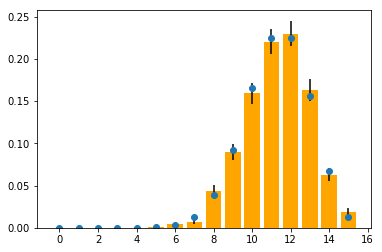

In [6]:
# Simulamos 1000 experimentos con n = 15, p = eficiencia = 0.75.
experim_bernoulli = [bernoulli(15, 0.75) for k in range(1000)]

# Comenzamos el proceso de graficar los resultados
fig_1 = plt.figure()
ax = fig_1.add_subplot(111)

#Generamos las alturas y los bordes de los bines. Normalizamos el área a 1
ys, bordes_bines = np.histogram(experim_bernoulli, bins=[x-0.5 for x in range(17)],
                                                normed=True)
# A partir de los bordes de los bines, generamos una lista de los centros de
# los bines, requerida por la función pyplot.bar:
centros_bines = 0.5*(bordes_bines[1:]+bordes_bines[:-1])

# Normalizamos el error poissoniano para mantener el error relativo:
error      = np.sqrt(ys)/np.sqrt(1000)

# Este ancho es puramente gráfico y no afecta a la normalización porque
# la hicimos con anterioridad:
ancho      = 0.8

# Ahora graficamos el histograma con pyplot:
ax.bar(centros_bines, ys, width=ancho, color='orange', yerr=error)

# Por último, graficamos la distribución analítica:
xs = range(16)
ax.plot(xs, binom.pmf(xs, 15, 0.75), 'o')

Se observa que la simulación se ajusta bien a la probabilidad teórica.

**(c)** *Ahora considere una fuente de intensidad media I = 15 fot s^(−1) . Simule el número de fotones emitidos
por la fuente en ∆t = 1 s del siguiente modo. Subdivida el intervalo ∆t en m >> 1 subintervalos iguales dt
(sugerencia: use m = 1000). Aproxime la probabilidad de que la fuente emita un fotón en dt como Idt, y
desprecie la probabilidad de emitir más de 1 fotón en el mismo intervalo (¿cómo justifica estas hipótesis?).
Simule entonces el número de fotones emitidos en cada dt usando el programa desarrollado en el punto
(a) (¿por qué es válido usar un programa que simula experimentos de Bernoulli?), y sumando sobre
todos los dt calcule el número total de fotones emitidos durante ∆t. Repita el experimento 1000 veces,
construya un histograma de los resultados y superponga a éste la distribución teórica correspondiente
(no olvide normalizar). Discuta el procedimiento y los resultados en base a las hipótesis del proceso de
Poisson.*

Si $dt = 1/1000$ s, entonces la probabilidad de emitir más de un fotón en un $dt$ es $$1 - Poisson(k = 0; 15/1000) - Poisson(k=1; 15/1000) = 0.00011...$$ mientras que las probabilidades de emitir uno o ninguno son $Poisson(k=1; 15/1000) = 0.014...$ y $Poisson(k = 0; 15/1000) = 0.98...$ respectivamente. En estas condiciones es válido aproximar la probabilidad de emitir más de un fotón como nula, y considerar que en cada intervalo o bien se emite un fotón, o bien no se emite ninguno. La forma de asignar las probabilidades a estos dos sucesos es con una binomial $Binomial(n = 1, p = 15/1000)$, de igual esperanza que la poissoniana que pretende aproximar.

Como la función `bernoulli(n,p)` genera números aleatorios con distibución $Binomial(n,p)$, podemos emplearla para simular la emisión o no emisión de un fotón durante un dt.

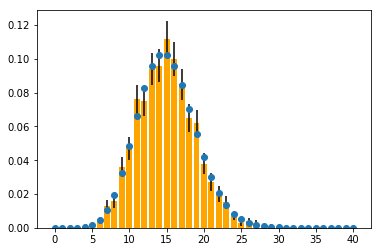

In [7]:
# Ahora simulamos una fuente que emite en promedio 15 fotones por segundo

#Realizando las aproximaciones que menciona la guía,
#en un dt la probabilidad de que se emita un fotón
#es 15*dt
I = 15 # en 1/segundos
m = 1000

# Una emisión de 1 segundo da como resultado un número de fotones que puede
# ser calculado como
#       sum(bernoulli(1, I*dt) for i in range(m))

def fotones(actividad, subdivisiones):
    "Generador de números aleatorios que representan el número de fotones \
    emitidos por una fuente de actividad 'actividad' en el lapso de 1 segundo.\
    El número de fotones emitidos se aproxima dividiendo al segundo en una cierta \
    cantidad de subdivisiones de duración dt =1/m y asumiendo que en cada uno de \
    esos intervalos se emite un fotón con probabilidad actividad*dt, o bien no se\
    emite ninguno."
    dt = 1 / subdivisiones # en segundos
    return sum(bernoulli(1, actividad * dt) for j in range(m))

# Simulamos 1000 de estos experimentos:
experim_fotones = [fotones(I,m) for k in range(1000)]

# Graficamos los resultados igual que en el punto previo.

fig_2 = plt.figure()
ax = fig_2.add_subplot(111)
#Generamos las alturas y los bordes de los bines. Normalizamos el área a 1
ys, bordes_bines = np.histogram(experim_fotones, bins=[x-0.5 for x in range(42)],
                                                normed=True)
# A partir de los bordes de los bines, generamos una lista de los centros de
# los bines, requerida por la función pyplot.bar:
centros_bines = 0.5*(bordes_bines[1:]+bordes_bines[:-1])
# Normalizamos el error poissoniano para mantener el error relativo:
error      = np.sqrt(ys)/np.sqrt(1000)
# Este ancho es puramente gráfico y no afecta a la normalización porque
# la hicimos con anterioridad:
ancho      = 0.8
# Ahora graficamos el histograma con pyplot:
ax.bar(centros_bines, ys, width=ancho, color='orange', yerr=error)
# Por último, graficamos la distribución analítica:
xs = range(41)
ax.plot(xs, poisson.pmf(xs, 15), 'o')

**(d)** _Dado el resultado de cada uno de los 1000 experimentos del punto anterior, use el mismo programa para
calcular el número de fotones detectados por el detector del punto (b), suponiendo que éste opera durante
∆t = 1s, y que todos los fotones emitidos llegan a él (i.e., que el detector subtiende un ángulo sólido de
4π visto desde la fuente). Realice el histograma correspondiente y compárelo con la distribución teórica
(no olvide normalizar). Discuta los resultados (vea el ejercicio 19b)._

Básicamente vamos a simular la composición de una distribución poissoniana de esperanza $I$ con una binomial con $p = \epsilon = 0.75$. La distribución teórica con la cual comprar el histograma obtenido será una poissoniana con esperanza $(I \times 1)\, \epsilon = 15 \, 0.75 = 11.25$, según el resultado del ejercicio 19b.

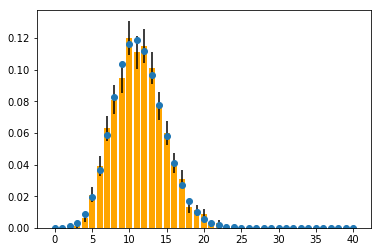

In [8]:
# Simulamos 1000 de estos experimentos:
    
I = 15 # en 1/segundos
m = 1000
eficiencia = 0.75
experim_compuestos = [bernoulli(fotones(I,m), eficiencia) for j in range(1000)]

# Graficamos los resultados igual que en los puntos previos

fig_3 = plt.figure()
ax = fig_3.add_subplot(111)
#Generamos las alturas y los bordes de los bines. Normalizamos el área a 1
ys, bordes_bines = np.histogram(experim_compuestos, bins=[x-0.5 for x in range(42)],
                                                normed=True)
# A partir de los bordes de los bines, generamos una lista de los centros de
# los bines, requerida por la función pyplot.bar:
centros_bines = 0.5*(bordes_bines[1:]+bordes_bines[:-1])
# Normalizamos el error poissoniano para mantener el error relativo:
error      = np.sqrt(ys)/np.sqrt(1000)
# Este ancho es puramente gráfico y no afecta a la normalización porque
# la hicimos con anterioridad:
ancho      = 0.8
# Ahora graficamos el histograma con pyplot:
ax.bar(centros_bines, ys, width=ancho, color='orange', yerr=error)
# Por último, graficamos la distribución analítica:
xs = range(41)
ax.plot(xs, poisson.pmf(xs, I * eficiencia), 'o')

**(e)** _Para ahorrar tiempo, usted podría haber considerado la emisión y detección de cada fotón en forma
conjunta, suponiendo una probabilidad efectiva (¿de qué valor?) para este proceso (¿cómo justifica
esta hipótesis?). Realice la simulación de este modo, grafique los histogramas y sus correspondientes
distribuciones teóricas. Muestre que el resultado es el mismo que el del punto anterior (en sentido
estadístico). Discuta el procedimiento y los resultados a la luz de la composición de un proceso de
Poisson con uno de Bernoulli._

(e) Ahora simulamos el mismo experimento físico que antes pero aprovechando que ya sabemos que composición de poisson con binomial es poisson. La distribución teórica contra la cual se compara es la misma que en el punto anterior.

Para la simulación, consideramos emisión y detección de forma conjunta planteando una probabilidad de emisión efectiva dada por una distribución poissoniana con esperanza $(I \times 1)\, \epsilon = 15 \, 0.75 = 11.25$. Esto es válido suponiendo que realmente todos los fotones emitidos por la fuente llegan al detector.

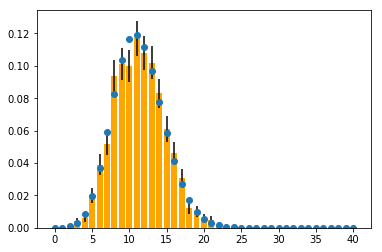

In [10]:
# Simulamos 1000 de estos experimentos:
I = 15 # en 1/segundos
m = 1000
eficiencia = 0.75
experim_compuestos_2 = [fotones(I * eficiencia,m) for k in range(1000)]

# Graficamos los resultados igual que en el punto previo.

fig_4 = plt.figure()
ax = fig_4.add_subplot(111)
#Generamos las alturas y los bordes de los bines. Normalizamos el área a 1
ys, bordes_bines = np.histogram(experim_compuestos_2, bins=[x-0.5 for x in range(42)],
                                                normed=True)
# A partir de los bordes de los bines, generamos una lista de los centros de
# los bines, requerida por la función pyplot.bar:
centros_bines = 0.5*(bordes_bines[1:]+bordes_bines[:-1])
# Normalizamos el error poissoniano para mantener el error relativo:
error      = np.sqrt(ys)/np.sqrt(1000)
# Este ancho es puramente gráfico y no afecta a la normalización porque
# la hicimos con anterioridad:
ancho      = 0.8
# Ahora graficamos el histograma con pyplot:
ax.bar(centros_bines, ys, width=ancho, color='orange', yerr=error)
# Por último, graficamos la distribución analítica:
xs = range(41)
ax.plot(xs, poisson.pmf(xs, I * eficiencia), 'o')

El resultado de este inciso no parece diferir mucho del del inciso previo. En efecto, los histogramas generados por ambos métodos se ajustan bastante bien a los valores teóricos predichos, que son exactamente los mismos en uno y otro caso dado que la composición de $Poisson(I \, \Delta t)$ con $Binomial(n, \epsilon)$ es exactamente $Poisson(I \, \Delta t \, \epsilon)$.